# MASQUE DE SOBEL SUR LUCAS GARDE DU 73

In [1]:
import numpy as np , matplotlib.pyplot as plt , cv2 , scipy as sp , cupy as cp

In [2]:
img = cv2.imread('31260198 [MConverter.eu].ppm', cv2.IMREAD_GRAYSCALE)

### METHODE SOBEL , n va appeller ces matrices les kernels

In [3]:
sobelX = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobelY = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

# Problème , on va pas pouvoir faire la trnasfo sur toute l'image car il y aura un problème de bord , en rajoutant un bord artificiel on peut.

In [34]:
def rajouterbord(image, combien):
    h, l = image.shape
    imggrande = np.zeros((h + 2*combien, l + 2*combien), dtype=image.dtype)
    imggrande[combien:combien+h, combien:combien+l] = image
    for i in range(combien):
        imggrande[i, combien:combien+l] = image[0, :]
        imggrande[combien+h+i, combien:combien+l] = image[-1, :]
    for j in range(combien):
        imggrande[:, j] = imggrande[:, combien]
        imggrande[:, combien+l+j] = imggrande[:, combien+l-1]
    for i in range(combien):
        for j in range(combien):
            imggrande[i, j] = image[0, 0]
            imggrande[i, -j-1] = image[0, -1]
            imggrande[-i-1, j] = image[-1, 0]
            imggrande[-i-1, -j-1] = image[-1, -1]
    return imggrande

In [35]:
def convolution(image, noyau):
    h, l = noyau.shape
    bord = h // 2
    imagebord = rajouterbord(image, bord)
    imageconv = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            zone = imagebord[i:i+h, j:j+l]
            imageconv[i, j] = np.sum(zone * noyau)
    return imageconv

## Gros test

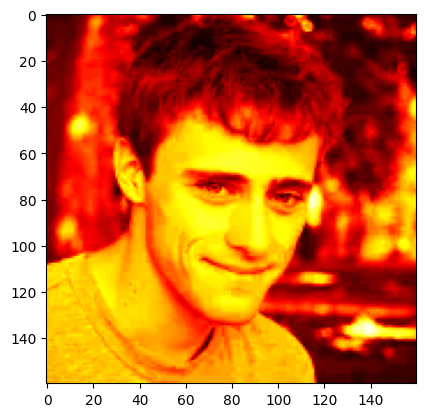

In [36]:
plt.imshow(img,cmap = 'hot')

In [37]:
# ce type est louche

In [38]:
ix = convolution(img, sobelX)
iy = convolution(img, sobelY)
grad = np.sqrt(ix**2 + iy**2).astype(np.uint8)

(np.float64(-0.5), np.float64(159.5), np.float64(159.5), np.float64(-0.5))

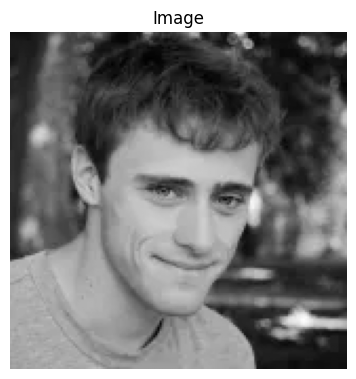

In [39]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.title("Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(159.5), np.float64(159.5), np.float64(-0.5))

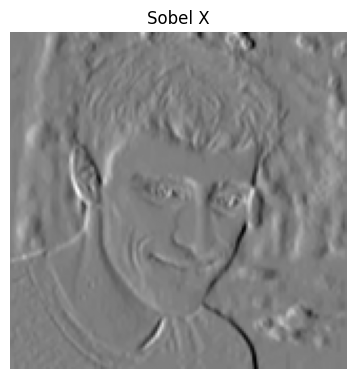

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 2)
plt.title("Sobel X")
plt.imshow(ix, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(159.5), np.float64(159.5), np.float64(-0.5))

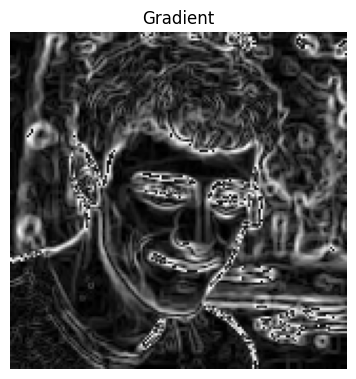

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 4)
plt.title("Gradient")
plt.imshow(grad, cmap='gray')
plt.axis('off')

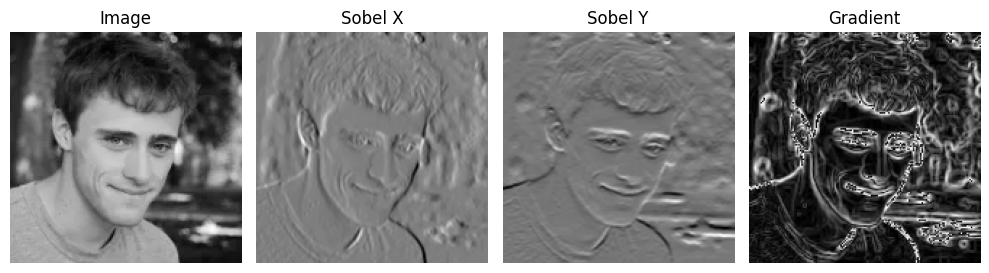

In [42]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 4, 1)
plt.title("Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Sobel X")
plt.imshow(ix, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Sobel Y")
plt.imshow(iy, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Gradient")
plt.imshow(grad, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Maintenant que l'on a appliqué les filtres de sobel on va chercher les contours

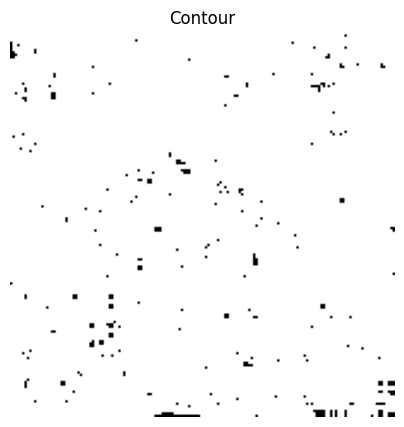

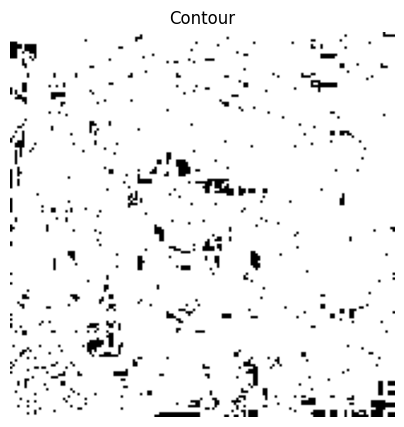

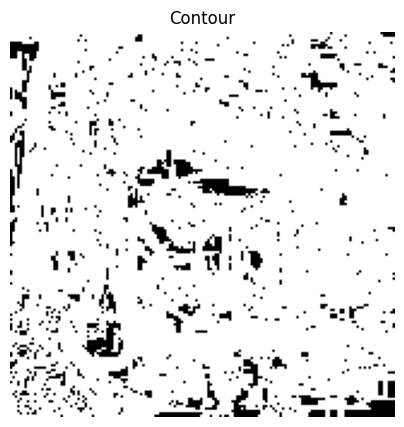

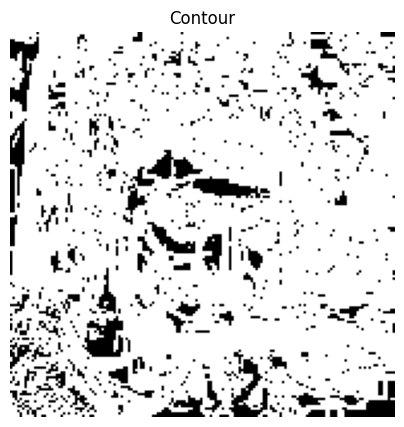

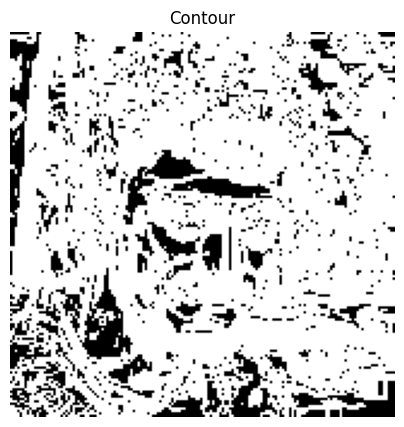

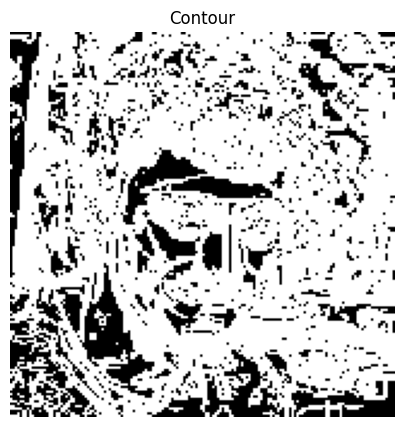

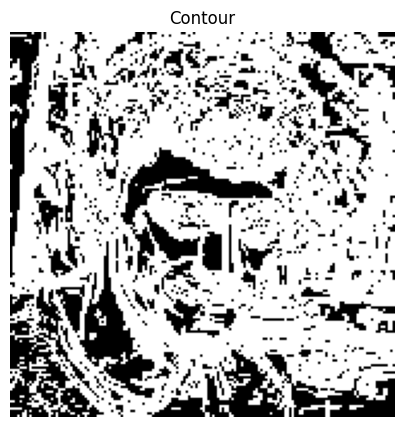

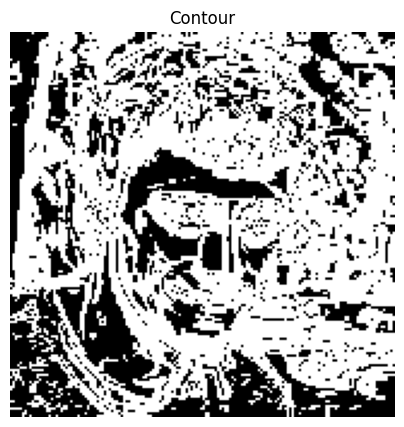

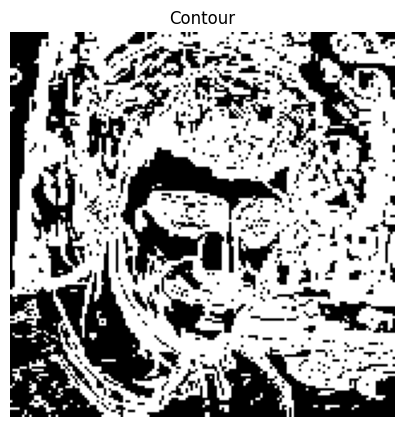

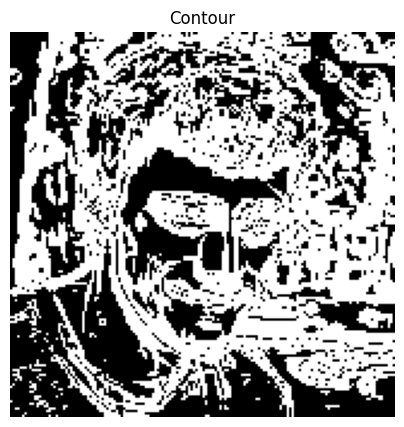

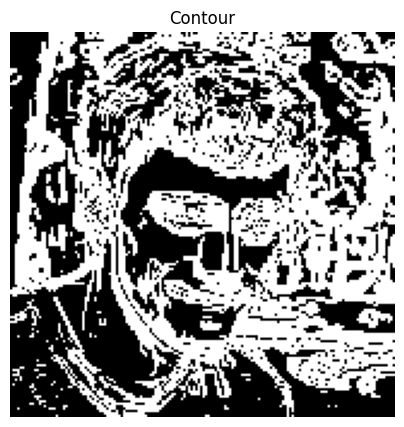

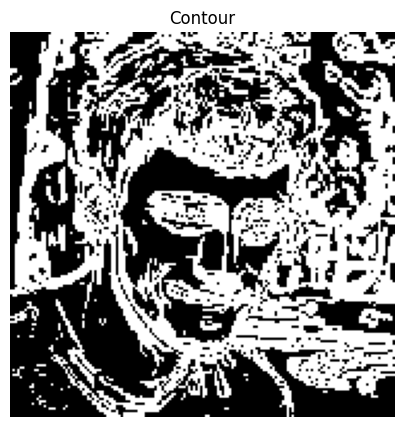

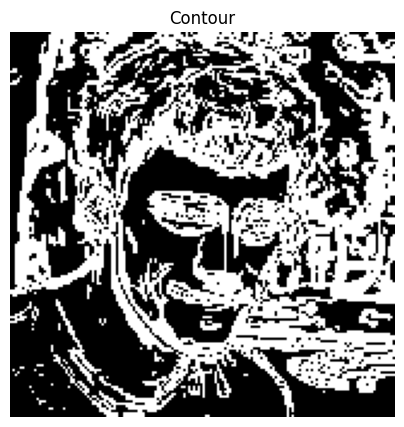

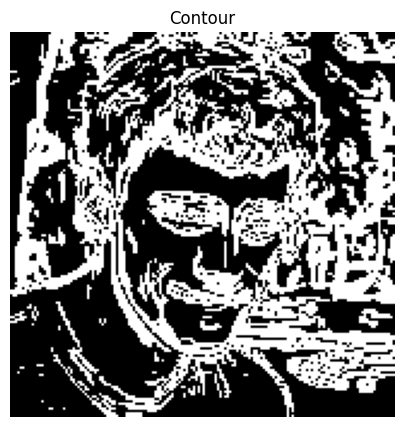

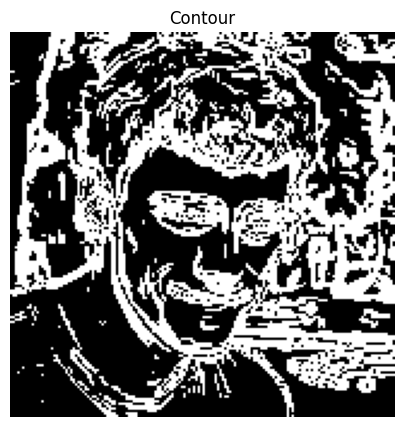

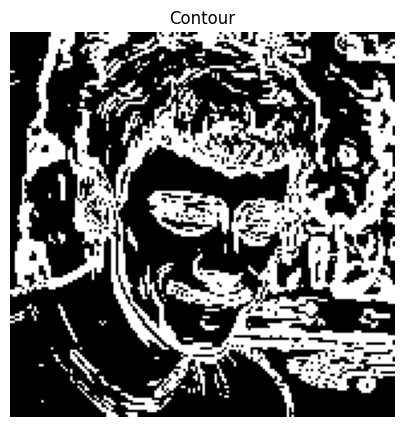

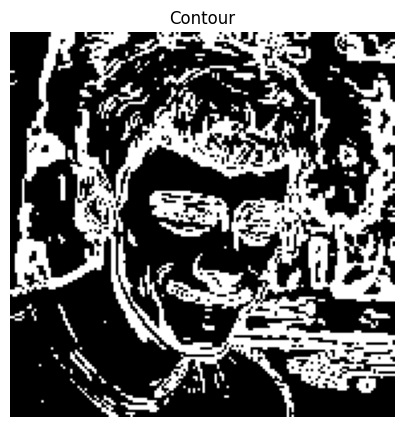

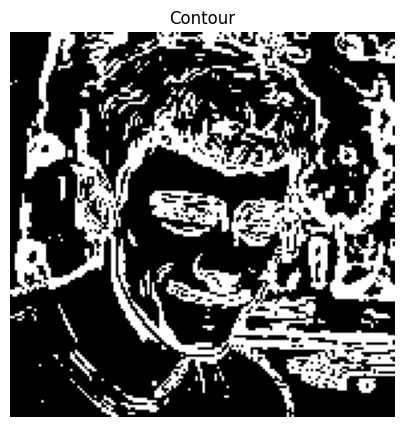

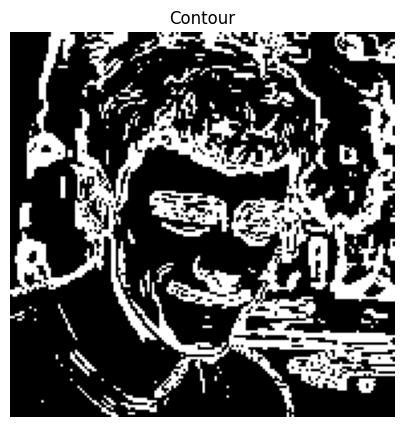

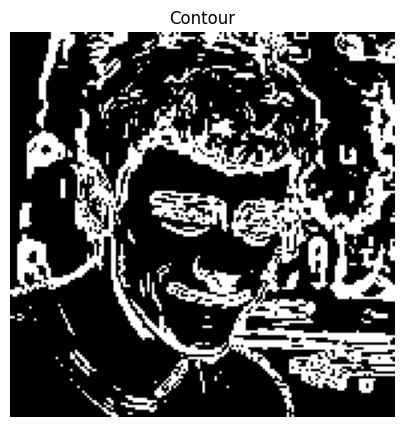

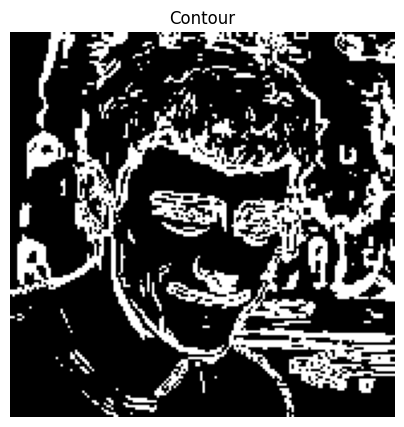

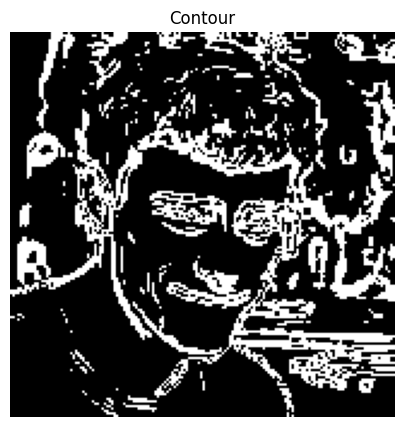

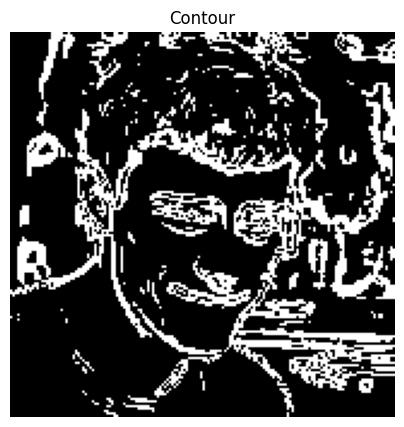

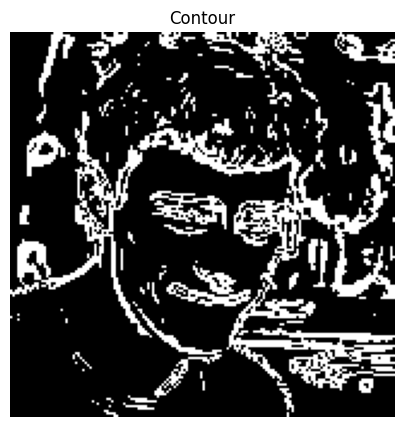

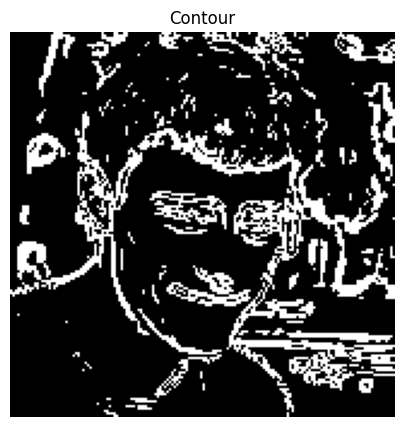

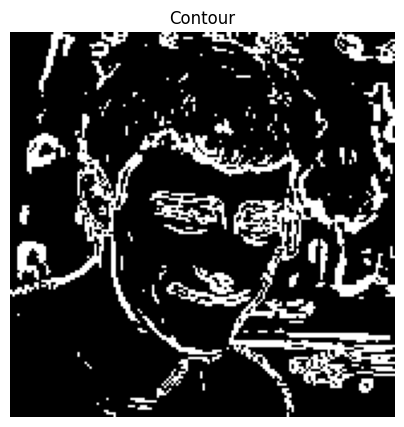

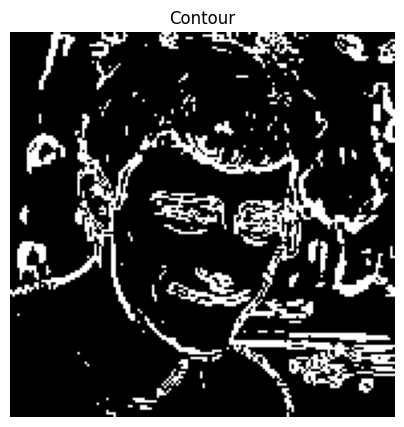

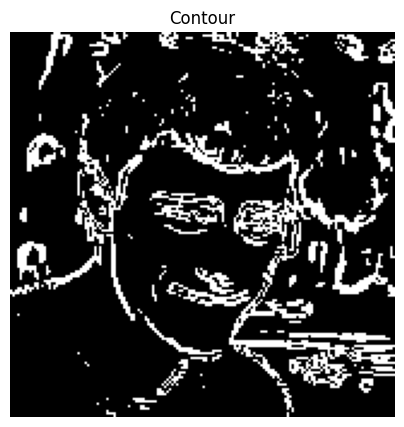

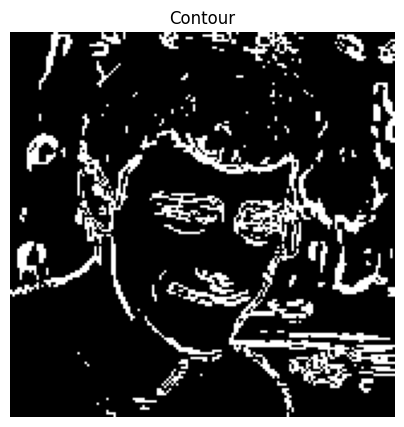

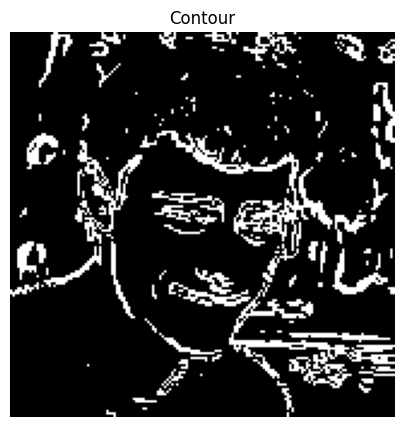

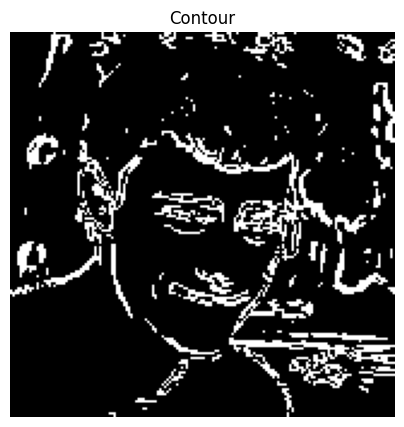

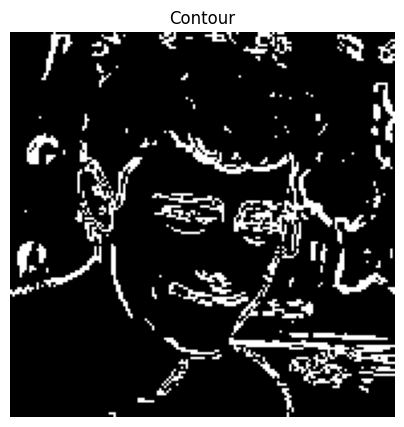

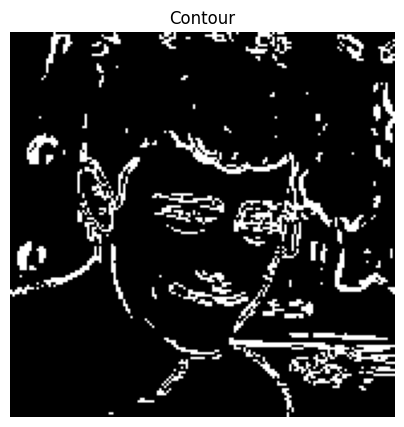

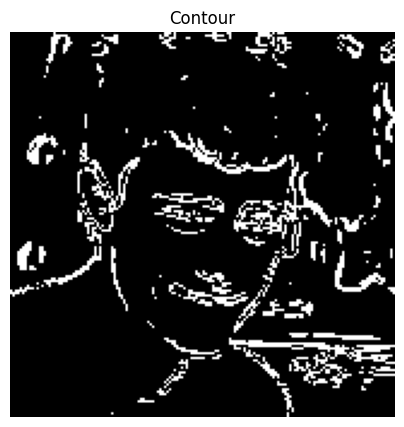

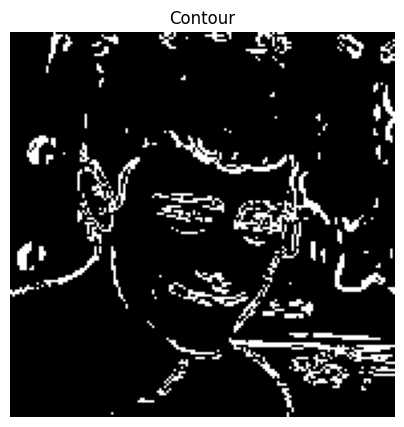

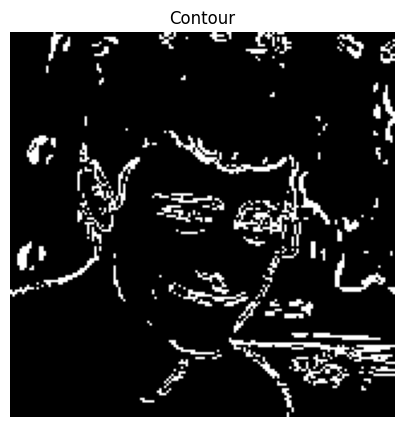

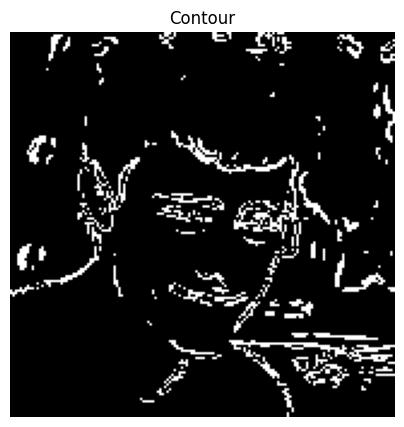

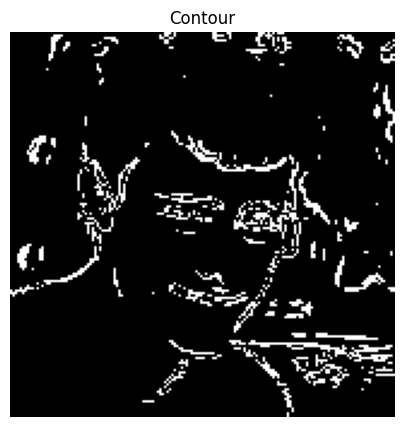

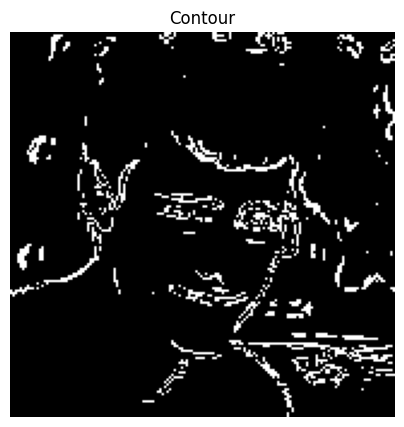

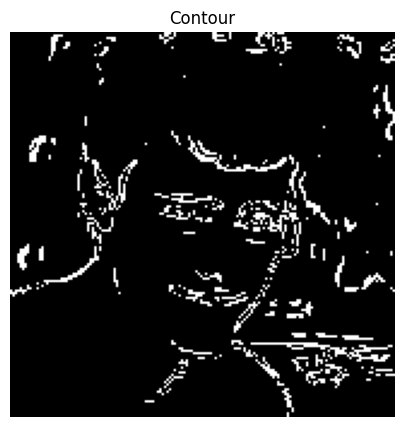

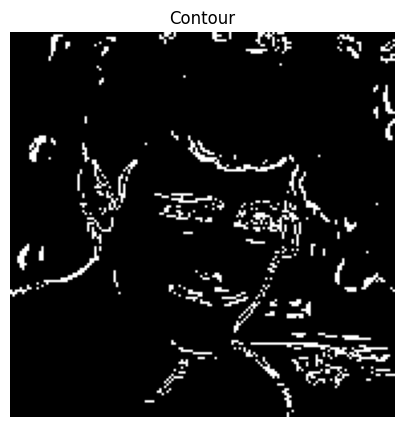

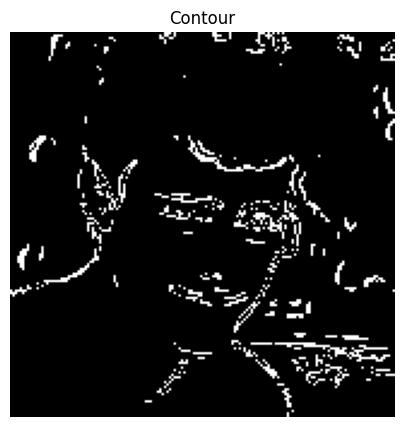

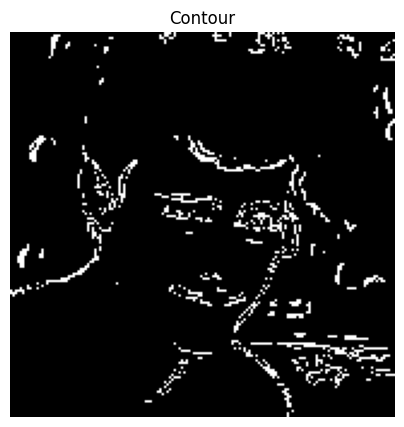

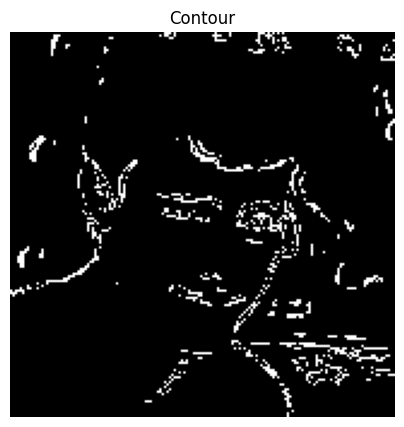

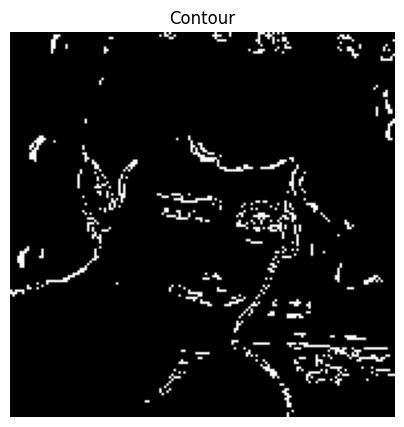

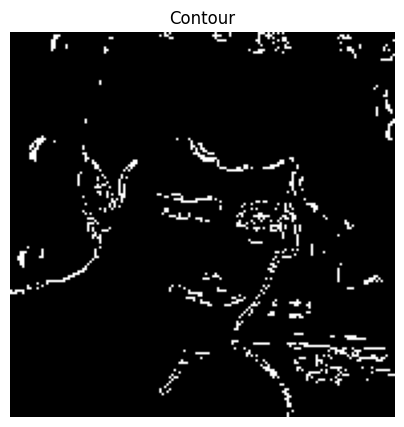

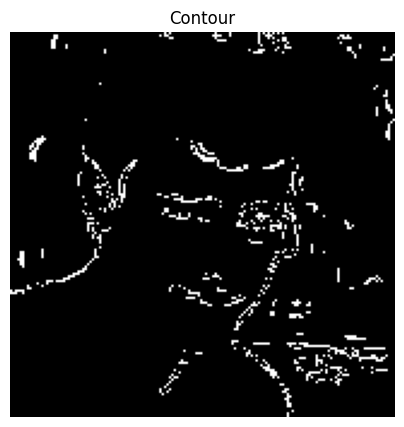

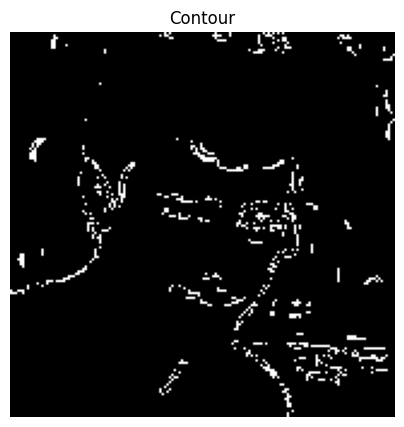

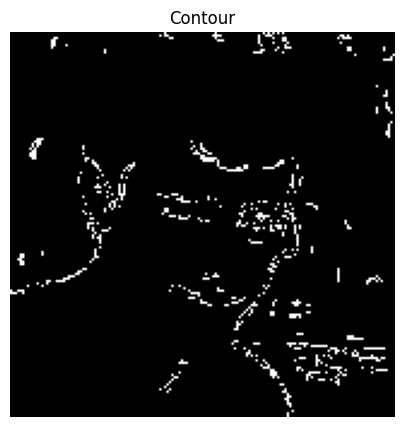

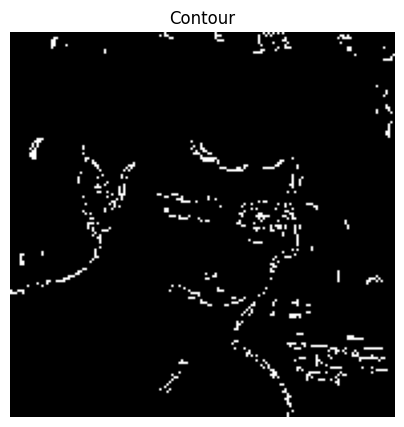

In [47]:
for i in np.arange(1,200,4):
    contours = (grad > i).astype(np.uint8) * 255
    plt.figure(figsize=(5, 5))
    plt.title("Contour")
    plt.imshow(contours, cmap='gray')
    plt.axis('off')
    plt.show()

## Idée à poursuivre : Tracer les droites sur le filtres de sobel avec la méthode naive ? Ou pas ?